# $\textbf{Bag of words}$

- A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

    - A vocabulary of known words.
    - A measure of the presence of known words.
- It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

Source: https://machinelearningmastery.com/gentle-introduction-bag-words-model/

In [ ]:
corpus = ['Machine learning is future',
          'I love data science',
          'I love NLP',
          'I love Deep Learning and Deep Learning love math']

# $\textbf{Count Vectorization technique}$
It Transform corpus into vectors by converts a collection of documents into a matrix of token counts
- Tokenization
- Vocabulary Creation
- Count Representation

In [ ]:
import nltk                             # Natural Language Toolkit (NLTK)
nltk.download('punkt', quiet =  True)
from nltk.tokenize import word_tokenize #tokenize the sentace
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
tokens = word_tokenize('I Love Nlp')
tokens

['I', 'Love', 'Nlp']

In [ ]:
count_vectorizer = CountVectorizer(lowercase = True, tokenizer = word_tokenize)

vectors = count_vectorizer.fit_transform(corpus).toarray() # if we don't apply toarray we will get a sparse array

feature_names = count_vectorizer.get_feature_names_out()

print('Feature Names:', feature_names)
print('Total Number of the features:', len(feature_names))

Feature Names: ['and' 'data' 'deep' 'future' 'i' 'is' 'learning' 'love' 'machine' 'math'
 'nlp' 'science']
Total Number of the features: 12


In [ ]:
corpus = ['Machine learning is future',
          'I love data science',
          'I love NLP',
          'I love Deep Learning and Deep Learning love math']

In [ ]:
print('Vectors:', '\n',  vectors)
print('Shape of array is:', vectors.shape)
print('Type of Vectors matrix:',  type(vectors))

Vectors: 
 [[0 0 0 1 0 1 1 0 1 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 1]
 [0 0 0 0 1 0 0 1 0 0 1 0]
 [1 0 2 0 1 0 2 2 0 1 0 0]]
Shape of array is: (4, 12)
Type of Vectors matrix: <class 'numpy.ndarray'>


In [ ]:
import pandas as pd

# Create a pandas DataFrame for better visualization
df = pd.DataFrame(vectors, columns = feature_names)

print('Corpus Matrix:\n', df)

Corpus Matrix:
    and  data  deep  future  i  is  learning  love  machine  math  nlp  science
0    0     0     0       1  0   1         1     0        1     0    0        0
1    0     1     0       0  1   0         0     1        0     0    0        1
2    0     0     0       0  1   0         0     1        0     0    1        0
3    1     0     2       0  1   0         2     2        0     1    0        0


$\textbf{Count Vectorizer with N-gram}$

- A more sophisticated approach is to create a vocabulary of grouped words. This both changes the scope of the vocabulary and allows the bag-of-words to capture a little bit more meaning from the document.

- In this approach, each word or token is called a “gram”. Creating a vocabulary of two-word pairs is, in turn, called a bigram model. Again, only the bigrams that appear in the corpus are modeled, not all possible bigrams.

In [ ]:
count_vectorizer = CountVectorizer(lowercase = True, tokenizer = word_tokenize,
                                   ngram_range = (1,2))    # Include N-gram Here.


                                          # Example Sentence
vectors = count_vectorizer.fit_transform(['I love deep learning']).toarray()

feature_names = count_vectorizer.get_feature_names_out()

print('Feature Names:', feature_names)
print('Total Number of the features:', len(feature_names))

Feature Names: ['deep' 'deep learning' 'i' 'i love' 'learning' 'love' 'love deep']
Total Number of the features: 7


In [ ]:
import pandas as pd

# Create a pandas DataFrame for better visualization
df = pd.DataFrame(vectors, columns = feature_names)

print('Corpus Matrix:\n', df)

Corpus Matrix:
    deep  deep learning  i  i love  learning  love  love deep
0     1              1  1       1         1     1          1


In [ ]:
# Now Applying CountVectorizer with N-Gram in whole corpus

count_vectorizer = CountVectorizer(lowercase = True, tokenizer = word_tokenize,
                                   ngram_range = (1,2))    # Include N-gram Here.

vectors = count_vectorizer.fit_transform(corpus).toarray()

feature_names = count_vectorizer.get_feature_names_out()

print('Feature Names:', feature_names)
print('Total Number of the features:', len(feature_names))

Feature Names: ['and' 'and deep' 'data' 'data science' 'deep' 'deep learning' 'future'
 'i' 'i love' 'is' 'is future' 'learning' 'learning and' 'learning is'
 'learning love' 'love' 'love data' 'love deep' 'love math' 'love nlp'
 'machine' 'machine learning' 'math' 'nlp' 'science']
Total Number of the features: 25


In [ ]:
print('Vectors:', '\n',  vectors)
print('Shape of array is:', vectors.shape)
print('Type of Vectors matrix:',  type(vectors))

Vectors: 
 [[0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0]
 [1 1 0 0 2 2 0 1 1 0 0 2 1 0 1 2 0 1 1 0 0 0 1 0 0]]
Shape of array is: (4, 25)
Type of Vectors matrix: <class 'numpy.ndarray'>


In [ ]:
import pandas as pd

# Create a pandas DataFrame for better visualization
df = pd.DataFrame(vectors, columns = feature_names)

# Set options to display all columns
pd.set_option('display.max_columns', None)

# Now print your DataFrame
print('Corpus Matrix:\n', df)

Corpus Matrix:
    and  and deep  data  data science  deep  deep learning  future  i  i love  \
0    0         0     0             0     0              0       1  0       0   
1    0         0     1             1     0              0       0  1       1   
2    0         0     0             0     0              0       0  1       1   
3    1         1     0             0     2              2       0  1       1   

   is  is future  learning  learning and  learning is  learning love  love  \
0   1          1         1             0            1              0     0   
1   0          0         0             0            0              0     1   
2   0          0         0             0            0              0     1   
3   0          0         2             1            0              1     2   

   love data  love deep  love math  love nlp  machine  machine learning  math  \
0          0          0          0         0        1                 1     0   
1          1          0       

$\textbf{Exercise: Unigram}$

In [ ]:
count_vectorizer = CountVectorizer(lowercase = True, tokenizer = word_tokenize,
                                   ngram_range = (  'Answer This'   ))    # Include N-gram Here.


                                          # Example Sentence
vectors = count_vectorizer.fit_transform(['I love deep learning']).toarray()

feature_names = count_vectorizer.get_feature_names_out()

print('Feature Names:', feature_names)
print('Total Number of the features:', len(feature_names))

$\textbf{Exercise: Trigram}$

In [ ]:
count_vectorizer = CountVectorizer(lowercase = True, tokenizer = word_tokenize,
                                   ngram_range = (  'Answer This'   ))    # Include N-gram Here.


                                          # Example Sentence
vectors = count_vectorizer.fit_transform(['I love deep learning']).toarray()

feature_names = count_vectorizer.get_feature_names_out()

print('Feature Names:', feature_names)
print('Total Number of the features:', len(feature_names))

# $\textbf{TF-IDF Vectorization technique}$

- $\text{TF-IDF (Term Frequency-Inverse Document Frequency)}:$ is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus).


- $\textbf{Term Frequency (TF):}$ Measures how frequently a term occurs in a document. It is calculated as:

    - $ \text{TF(t, d)} = \frac{\text{Number of times term t appears in a document d}}{\text{Total number of terms in the document d}}$



- $\textbf{Inverse Document Frequency(IDF):}$ It measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:
    - $ \text{IDF(t)} = \log \frac{\text{Total  number of documents}} {\text{Number of documents with term t}}$

    - Sometimes, 1 is added to the denominator to avoid division by zero, making the formula:
    - $ \text{IDF(t)} = \log\frac{\text{Total  number of documents}} {1 + \text{Number of documents with term t}}$


- $\textbf{TF-IDF:}$ The product of TF and IDF. It gives the importance of a term in a document considering the corpus:

    - $ \text{TF-IDF(𝑡,𝑑) = TF(𝑡,𝑑)} \times IDF(𝑡)$


Source: https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/

In [ ]:
corpus = ['Machine learning is future',
          'I love data science',
          'I love NLP',
          'I love Deep Learning and Deep Learning love math']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(lowercase = True, tokenizer = word_tokenize)

tfidf_vectors = tfidf_vectorizer.fit_transform(corpus).toarray()

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print('TF-IDF Feature Names:', tfidf_feature_names)
print('Total TF-IDF Feature:', len(tfidf_feature_names))

TF-IDF Feature Names: ['and' 'data' 'deep' 'future' 'i' 'is' 'learning' 'love' 'machine' 'math'
 'nlp' 'science']
Total TF-IDF Feature: 12


In [ ]:
df = pd.DataFrame(tfidf_vectors, columns = tfidf_feature_names)

# Display the DataFrame showing TF-IDF vectors
print("TF-IDF Vectors:")

print(df)

TF-IDF Vectors:
        and      data      deep    future         i        is  learning  \
0  0.000000  0.000000  0.000000  0.525473  0.000000  0.525473  0.414289   
1  0.000000  0.596039  0.000000  0.000000  0.380444  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.473804  0.000000  0.000000   
3  0.308263  0.000000  0.616526  0.000000  0.196760  0.000000  0.486076   

       love   machine      math       nlp   science  
0  0.000000  0.525473  0.000000  0.000000  0.000000  
1  0.380444  0.000000  0.000000  0.000000  0.596039  
2  0.473804  0.000000  0.000000  0.742306  0.000000  
3  0.393521  0.000000  0.308263  0.000000  0.000000  


$\textbf{TF-IDF with N-gram}$

- A more sophisticated approach is to create a vocabulary of grouped words. This both changes the scope of the vocabulary and allows the bag-of-words to capture a little bit more meaning from the document.

- In this approach, each word or token is called a “gram”. Creating a vocabulary of two-word pairs is, in turn, called a bigram model. Again, only the bigrams that appear in the corpus are modeled, not all possible bigrams.

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(lowercase = True, tokenizer = word_tokenize,
                                                     ngram_range = (1,2))


                                               # Example Sentence
tfidf_vectors = tfidf_vectorizer.fit_transform(['I Love Nlp']).toarray()

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print('TF-IDF Feature Names:', tfidf_feature_names)
print('Total TF-IDF Feature:', len(tfidf_feature_names))

TF-IDF Feature Names: ['i' 'i love' 'love' 'love nlp' 'nlp']
Total TF-IDF Feature: 5


In [ ]:
df = pd.DataFrame(tfidf_vectors, columns = tfidf_feature_names)

# Display the DataFrame showing TF-IDF vectors
print("TF-IDF Vectors:")

print(df)

TF-IDF Vectors:
          i    i love      love  love nlp       nlp
0  0.447214  0.447214  0.447214  0.447214  0.447214


In [ ]:
# Apply tfidf for corpus using ngrams

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(lowercase = True, tokenizer = word_tokenize,
                                                     ngram_range = (1,2))


tfidf_vectors = tfidf_vectorizer.fit_transform(corpus).toarray()

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print('TF-IDF Feature Names:', tfidf_feature_names)
print('Total TF-IDF Feature:', len(tfidf_feature_names))

TF-IDF Feature Names: ['and' 'and deep' 'data' 'data science' 'deep' 'deep learning' 'future'
 'i' 'i love' 'is' 'is future' 'learning' 'learning and' 'learning is'
 'learning love' 'love' 'love data' 'love deep' 'love math' 'love nlp'
 'machine' 'machine learning' 'math' 'nlp' 'science']
Total TF-IDF Feature: 25


In [ ]:
print('Vectors:', '\n',  tfidf_vectors)
print('Shape of array is:', tfidf_vectors.shape)
print('Type of Vectors matrix:',  type(tfidf_vectors))

Vectors: 
 [[0.         0.         0.         0.         0.         0.
  0.38861429 0.         0.         0.38861429 0.38861429 0.30638797
  0.         0.38861429 0.         0.         0.         0.
  0.         0.         0.38861429 0.38861429 0.         0.
  0.        ]
 [0.         0.         0.4375946  0.4375946  0.         0.
  0.         0.27931097 0.27931097 0.         0.         0.
  0.         0.         0.         0.27931097 0.4375946  0.
  0.         0.         0.         0.         0.         0.
  0.4375946 ]
 [0.         0.         0.         0.         0.         0.
  0.         0.3555803  0.3555803  0.         0.         0.
  0.         0.         0.         0.3555803  0.         0.
  0.         0.55708525 0.         0.         0.         0.55708525
  0.        ]
 [0.22399446 0.22399446 0.         0.         0.44798892 0.44798892
  0.         0.14297276 0.14297276 0.         0.         0.35319961
  0.22399446 0.         0.22399446 0.28594552 0.         0.22399446
  0.223

$\textbf{ Exercise TF-IDF with Unigram}$

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(lowercase = True, tokenizer = word_tokenize,
                                                     ngram_range = ('Answer This'))

tfidf_vectors = tfidf_vectorizer.fit_transform(['I Love Nlp']).toarray()

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print('TF-IDF Feature Names:', tfidf_feature_names)
print('Total TF-IDF Feature:', len(tfidf_feature_names))

$\textbf{Exercise TF-IDF with Trigram}$

In [ ]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(lowercase = True, tokenizer = word_tokenize,
                                                     ngram_range = ('Answer This'))

tfidf_vectors = tfidf_vectorizer.fit_transform(['I Love Nlp']).toarray()

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

print('TF-IDF Feature Names:', tfidf_feature_names)
print('Total TF-IDF Feature:', len(tfidf_feature_names))

## $\textbf{Experiment with Quora text classification dataset: }$

Dataset link: https://www.kaggle.com/competitions/quora-insincere-questions-classification/data

$\text{Downloading the data from givem google drive link}$

In [1]:
import gdown

train_file_id = '1wFxiEvmL1t-gZUd3H0iY2Z2lOTFMlPqa'
test_file_id = '15hU-cIEusm-kTIbsAQkmt6hfDv-eqb0P'

train_destination = 'train.csv'
test_destination = 'test.csv'

train_url = f'https://drive.google.com/uc?id={train_file_id}'
test_url = f'https://drive.google.com/uc?id={test_file_id}'

# Download the files
gdown.download(train_url, train_destination, quiet=False)
gdown.download(test_url, test_destination, quiet=False)

# Verify the files exist
import os
print(os.listdir('.'))

Downloading...
From (original): https://drive.google.com/uc?id=1wFxiEvmL1t-gZUd3H0iY2Z2lOTFMlPqa
From (redirected): https://drive.google.com/uc?id=1wFxiEvmL1t-gZUd3H0iY2Z2lOTFMlPqa&confirm=t&uuid=73510301-2fa2-440e-a4e3-ebba7cd52d77
To: /content/train.csv
100%|██████████| 124M/124M [00:01<00:00, 78.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=15hU-cIEusm-kTIbsAQkmt6hfDv-eqb0P
To: /content/test.csv
100%|██████████| 35.0M/35.0M [00:00<00:00, 59.8MB/s]

['.config', 'train.csv', 'test.csv', 'sample_data']


$\textbf{Data Procesing}$

In [2]:
import nltk                       # Natural Language Toolkit (NLTK)
nltk.download('punkt', quiet=  True)
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

- Given Labels for each sentences:
    - Zero for Sincere Question
    - One for Insincere Question

In [3]:
train_path = '/content/train.csv'
test_path = '/content/test.csv'

In [4]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [5]:
train.target.value_counts()

,count
target,
0,1225312
1,80810


In [6]:
# Shuffle the DataFrame

train = train.sample(frac = 1).reset_index(drop = True)
train.head(10)

,qid,question_text,target
0,37a7a7b9385dd2f7b4a0,Can you trade digital Xbox one games with a fr...,0
1,7832498f025fa4d78f06,Can an Honest Person Successfully & Profitably...,0
2,1bdcfc0980efb4fa228a,What do computer engineers do in the automobil...,0
3,8370980ee6107826e983,Was Hitler's dog mean?,0
4,4f72857a50339eee8f24,"Have you ever thought you copied something, bu...",0
5,593cf7c9836658ce0962,How do Indian Muslims feel when they learn tha...,1
6,61ac16931ffada04e0f8,Does Kindle fire have enternet. Explorers?,0
7,c7560c7615a83923ca7f,What are the causes of swollen neck glands?,0
8,01ef5739f538dd67ee05,Is it true that an average American doesn't kn...,0
9,883abc3642ce1c58a6cd,What muscles does a front crawl exercise?,0


In [7]:
train.shape, test.shape

((1306122, 3), (375806, 2))

In [8]:
test.head(5)

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


- Text Processing
    - Tokenization: Tokenization is the process of dividing a text into smaller units called tokens.
    - Stop Word removal: Stop words are common words that are often filtered out in text processing because they do not carry significant meaning for the analysis. Examples of stop words include "is", "and", "the", "in", etc.
    - Stemming: Stemming is a text normalization technique where words are reduced to their root form by removing suffixes and prefixes. Stemmed words may not necessarily be actual words.
    - Lemmatization: Lemmatization is the process of reducing a word to its base or root form (lemma). In linguistics, a lemma is the base or root form of a word.

In [9]:
q1 = train['question_text'].values[99]   # Accessing the 100th question
l1 = train['target'].values[99]
print('Question is:', q1)
print('Label is:', l1)

Question is: How much would a diamond as big as the sun cost?
Label is: 0


In [10]:
q1_token = word_tokenize(q1)
print(q1_token)
print('Length of q1_token:', len(q1_token))

['How', 'much', 'would', 'a', 'diamond', 'as', 'big', 'as', 'the', 'sun', 'cost', '?']
Length of q1_token: 12


Stop Word Removal:
- Stop word removal is the process of filtering out common words from text data that usually don't contribute much meaning in the context of natural language processing (NLP) tasks.

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=  True)

english_stopwords = stopwords.words('english')
print('Stopwords are:', ', '.join(english_stopwords))

Stopwords are: i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn

In [12]:
# Remove tokens that contain non-alphabetic characters

q1_token = [word for word in q1_token if word.isalpha()]
print(', '.join(q1_token))

How, much, would, a, diamond, as, big, as, the, sun, cost


In [13]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

In [14]:
q1_stp = remove_stopwords(q1_token)
q1_stp
print(q1_stp)
print('Length of stopwords:', len(q1_stp))

['much', 'would', 'diamond', 'big', 'sun', 'cost']
Length of stopwords: 6


Stemming:

- Original words: 'go', 'gone', 'going', 'birds', 'bird'
- Stemmed words: 'go', 'bird'
- Because in terms of the counting frequency and the meaning both of these have exactly same effect.

In [15]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language = 'english')

In [16]:
stemmer.stem('happiness'), stemmer.stem('going'), stemmer.stem('birds'), stemmer.stem('suppossed')

('happi', 'go', 'bird', 'supposs')

In [17]:
q1_stem = [stemmer.stem(word) for word in q1_stp]
print(q1_stem)

['much', 'would', 'diamond', 'big', 'sun', 'cost']


In [18]:
print(q1_stp)

['much', 'would', 'diamond', 'big', 'sun', 'cost']


Lemmatization: Lemmatization is the process of reducing a word to its base form (Lemma refers to the base form of a word).
- For example:

    - The lemma of the word "running" is "run".
    - The lemma of the word "happiness" is "happy".
    - The lemma of the word "cities" is "city".

In [19]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet', quiet=  True)

lemmatizer = WordNetLemmatizer()

In [20]:
stemmer.stem('happiness'), stemmer.stem('cities')

('happi', 'citi')

In [21]:
lemmatizer.lemmatize('happiness'), lemmatizer.lemmatize('cities')

('happiness', 'city')

In [22]:
# Lemmatize each word
lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in q1_stp]

print(lemmatized_words)

['much', 'would', 'diamond', 'big', 'sun', 'cost']


## Implementation of Bag of words

1) Create a vocabulary using count vectorizer. \
2) Transform the text to vectors using the count vectorizer.

Count vectorizer converts the collection of text documents to a matrix of token counts

# $\textbf{Count Vectorization technique}$
Transform Document into vector

In [23]:
from sklearn.feature_extraction.text import CountVectorizer


def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

# Remove tokens that are non-alphabetic characters
def remove_non_alphabetic(tokens):
    return [word for word in tokens if word.isalpha()]

def tokenize(text):

    # Tokenize the words
    tokens = nltk.word_tokenize(text)

    # Removing the non_alphabetic characters
    tokens = remove_non_alphabetic(tokens)

    # Removing the stopwords
    tokens = remove_stopwords(tokens)

    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]

    return lemmatized_tokens

In [24]:
vectorizer = CountVectorizer(lowercase = True, tokenizer = tokenize,
                            stop_words = english_stopwords,
                            max_features = 1000)

In [25]:
train['target'][:10000].value_counts()

,count
target,
0,9359
1,641


In [26]:
# Use only small data only first 10000 samples for training and validation

vectorizer.fit(train['question_text'][:10000])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7e1c48eca4d0>)

In [27]:
data = vectorizer.transform(train['question_text'][:10000])

In [28]:
data.shape

(10000, 1000)

In [29]:
print(type(data))

<class 'scipy.sparse._csr.csr_matrix'>


In [30]:
data_array = data.toarray()
data_array.shape

(10000, 1000)

In [31]:
target_array = np.array(train['target'][:10000]).reshape(-1,1)

In [32]:
target_array.shape

(10000, 1)

In [33]:
train, val, train_label, val_label = train_test_split(data_array, target_array, test_size=0.2, random_state=42)

print('Training set shape:', train.shape)
print('Validation set shape:', val.shape)

Training set shape: (8000, 1000)
Validation set shape: (2000, 1000)


# $\textbf{Logistic Regression for text classification}$

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(train, train_label.reshape(-1))

val_pred = model.predict(val)

from sklearn.metrics import accuracy_score, f1_score

print('Accuracy for validation data', accuracy_score(val_label, val_pred))
print('F1 score for validation data', f1_score(val_label, val_pred))

Accuracy for validation data 0.943
F1 score for validation data 0.3804347826086957


# $\textbf{Data Loader for the text data}$

In [35]:
train_dataset = []

for i in range(8000):
    train_dataset.append((train[i], train_label[i][0]))

In [36]:
val_dataset = []

for i in range(2000):
    val_dataset.append((val[i], val_label[i][0]))

In [37]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [38]:
# Create a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = 32, shuffle = True)

In [39]:
for x, y in train_dataloader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([32, 1000])
torch.Size([32])


In [40]:
x, y = next(iter(train_dataloader))
print(x.shape, y.shape)

torch.Size([32, 1000]) torch.Size([32])


# $\textbf{Neural Network for text classification}$

In [41]:
class classifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.network = nn.Sequential(
                                        nn.Linear(in_features = input_dim, out_features = 800),     # 1st Hidden layer
                                        nn.ReLU(),
                                        nn.Dropout(p = 0.50),
                                        nn.Linear(in_features = 800, out_features = 400),           # 2nd Hidden layer
                                        nn.ReLU(),
                                        nn.Dropout(p = 0.50),
                                        nn.Linear(in_features = 400, out_features = output_dim),
                                        nn.Sigmoid()
                                                        )

    def forward(self, x):
        return self.network(x)

In [42]:
model = classifier(input_dim = 1000, output_dim = 2)

optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.00009)

loss_fn = torch.nn.BCELoss()

In [43]:
def accuracy_fn(y_pred,y):
    return torch.sum(y_pred == y)/len(y)

epochs = 20

val_ac = []
train_ac = []
val_lo = []
train_lo = []

for epoch in range(epochs):

    train_loss = 0
    train_acc = 0

    for x, y in train_dataloader:
        # print(x.shape, y.shape)
        x = x.unsqueeze(dim = 1).to(dtype = torch.float32)
        # print(x.shape, y.shape)
        y_probs = model(x)

        y_true = torch.zeros(y_probs.shape)

        for i in range(y_true.size(0)):
            y_true[i, 0, y[i]] = 1

        loss = loss_fn(y_probs, y_true)
        train_loss += loss

        y_pred = torch.argmax(y_probs, dim = -1)
        y_pred = y_pred.view(-1)

        train_acc +=  accuracy_fn(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)   # Average loss per batch
    train_acc  /= len(train_dataloader)   # Average Accuracy per batch

    train_lo.append(train_loss)
    train_ac.append(train_acc)

    model.eval()

    with torch.inference_mode():

        val_loss = 0
        val_acc = 0

        for x, y in val_dataloader:

            x = x.unsqueeze(dim = 1).to(dtype = torch.float32)

            y_probs = model(x)

            y_true = torch.zeros(y_probs.shape)

            for i in range(y_true.size(0)):
                y_true[i, 0, y[i]] = 1

            loss = loss_fn(y_probs, y_true)
            val_loss += loss

            y_pred = torch.argmax(y_probs, dim = -1)
            y_pred = y_pred.view(-1)

            val_acc +=  accuracy_fn(y_pred, y)

        val_loss /= len(val_dataloader)   # Average loss per batch
        val_acc  /= len(val_dataloader)   # Average Accuracy per batch

        val_lo.append(val_loss)
        val_ac.append(val_acc)

    print(f'Epoch:{epoch} Train loss:{train_loss: .4f} Train accuracy:{train_acc: .2f} Val loss:{val_loss: .4f} Val accuracy:{val_acc: .2f}')

Epoch:0 Train loss: 0.6900 Train accuracy: 0.74 Val loss: 0.6891 Val accuracy: 0.94
Epoch:1 Train loss: 0.6877 Train accuracy: 0.93 Val loss: 0.6863 Val accuracy: 0.94
Epoch:2 Train loss: 0.6850 Train accuracy: 0.94 Val loss: 0.6835 Val accuracy: 0.94
Epoch:3 Train loss: 0.6822 Train accuracy: 0.94 Val loss: 0.6808 Val accuracy: 0.94
Epoch:4 Train loss: 0.6795 Train accuracy: 0.94 Val loss: 0.6781 Val accuracy: 0.94
Epoch:5 Train loss: 0.6769 Train accuracy: 0.94 Val loss: 0.6753 Val accuracy: 0.94
Epoch:6 Train loss: 0.6742 Train accuracy: 0.94 Val loss: 0.6727 Val accuracy: 0.94
Epoch:7 Train loss: 0.6716 Train accuracy: 0.94 Val loss: 0.6700 Val accuracy: 0.94
Epoch:8 Train loss: 0.6689 Train accuracy: 0.94 Val loss: 0.6673 Val accuracy: 0.94
Epoch:9 Train loss: 0.6663 Train accuracy: 0.94 Val loss: 0.6647 Val accuracy: 0.94
Epoch:10 Train loss: 0.6637 Train accuracy: 0.94 Val loss: 0.6621 Val accuracy: 0.94
Epoch:11 Train loss: 0.6612 Train accuracy: 0.94 Val loss: 0.6595 Val accur

In [44]:
train_loss = [tensor.item() for tensor in train_lo]
val_loss = [tensor.item() for tensor in val_lo]

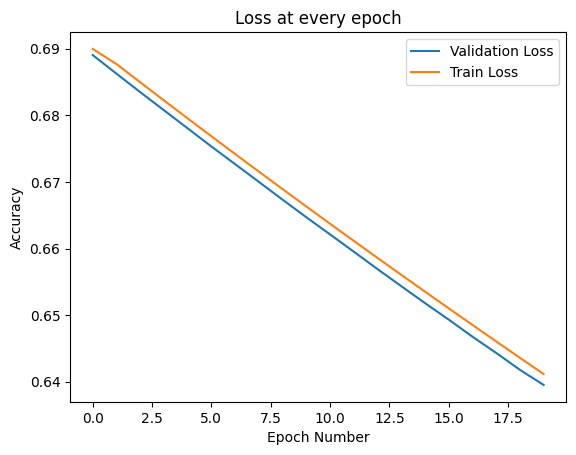

In [45]:
import matplotlib.pyplot as plt

plt.plot(np.arange(epochs), val_loss, label = 'Validation Loss')
plt.plot(np.arange(epochs), train_loss, label = 'Train Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Loss at every epoch')
plt.legend(loc = 'upper right')
plt.show()

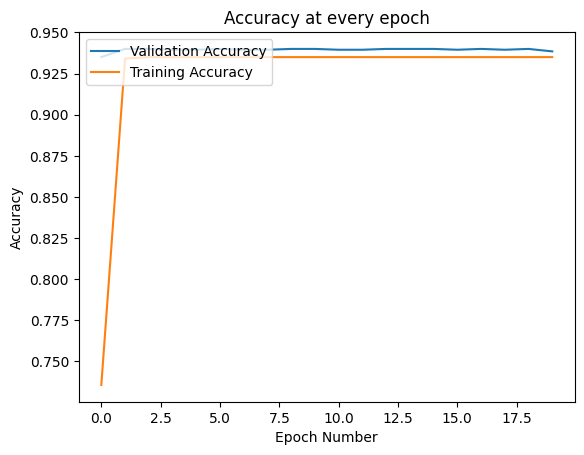

In [46]:
import matplotlib.pyplot as plt

plt.plot(np.arange(epochs), val_ac, label = 'Validation Accuracy')
plt.plot(np.arange(epochs), train_ac, label = 'Training Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Accuracy at every epoch')
plt.legend(loc = 'upper left')
plt.show()

$\textbf{Exercise Now making data matrix from TF-IDF Vectorization technique}$

In [47]:
train_path = '/content/train.csv'

train = pd.read_csv(train_path)

# Shuffle the DataFrame

train = train.sample(frac = 1).reset_index(drop = True)
train.head(10)

,qid,question_text,target
0,8a8bb8be80262bea774e,How was Pokki developed?,0
1,43dc341bd3f8f6d2a4e7,What is the difference between project managem...,0
2,ff8775bebd87837d268a,What is the training schedule for the ASO in CSS?,0
3,a3a68c0ff5e3c2245793,What are the key skills people from non-financ...,0
4,e37c5b62ed2f6aa5bd5a,Who is the strongest god?,0
5,db9ef36f2dad3d569a32,Who was the founder of petrol engine?,0
6,a56b9eefc8781d25c930,"Can you hear the speech of Dr.rajendra Prasad,...",0
7,2f7268607f274213769a,Show me passwords?,0
8,5b7e58ff006b1cc1ab31,Are there men in Western countries who are alw...,0
9,cad0fa6ff1d8a0fde471,If you love someone from many years but she do...,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

def tokenize(text):

    # Tokenize the words
    tokens = nltk.word_tokenize(text)

    tokens = remove_stopwords(tokens)

    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]

    return lemmatized_tokens

In [ ]:
vectorizer = TfidfVectorizer(lowercase = True, tokenizer= tokenize,
                            stop_words = english_stopwords,
                            max_features = 1000)

In [ ]:
# Use only samll data only first 10000 samples for training and validation
vectorizer.fit(train['question_text'][:10000])

data = vectorizer.transform(train['question_text'][:10000])
print(data.shape)
type(data)

(10000, 1000)


scipy.sparse._csr.csr_matrix

This is Tfidf Data array

In [ ]:
data_array = data[:10000].toarray()
data_array.shape

(10000, 1000)

In [ ]:
target_array = np.array(train['target'][:10000]).reshape(-1,1)
target_array.shape

(10000, 1)

In [ ]:
train, val, train_label, val_label = train_test_split(data_array, target_array, test_size=0.2, random_state=42)

print('Training set shape:', train.shape)
print('Validation set shape:', val.shape)

Training set shape: (8000, 1000)
Validation set shape: (2000, 1000)


$\textbf{Exercise put this TFIDF data matrix into Machine Learning Classifier}$

$\textbf{Data Loader}$

In [ ]:
train_dataset = []

for i in range(8000):
    train_dataset.append((train[i], train_label[i][0]))

val_dataset = []

for i in range(2000):
    val_dataset.append((val[i], val_label[i][0]))

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader

# Create a DataLoader
tfidf_train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
tfidf_val_dataloader = DataLoader(val_dataset, batch_size = 64, shuffle = True)

for x, y in tfidf_train_dataloader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 1000])
torch.Size([64])


$\textbf{Exercise feed this TFIDF data matrix into Neural network Classifier}$
